# Introduction to Scikit-Learn: Machine Learning with Python

**Regression**

Tony Yao-Jen Kuo

## Regression

## About regression

One of the simplest regression problems is fitting a line to data, which we've seen previously.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

train_url = "https://storage.googleapis.com/kaggle_datasets/House-Prices-Advanced-Regression-Techniques/train.csv"
train_df = pd.read_csv(train_url)
X_train = train_df["GrLivArea"].values.reshape(-1, 1)
y_train = train_df["SalePrice"].values.reshape(-1, 1)
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [2]:
xfit = np.linspace(X_train.min() - 10, X_train.max() + 10, 100).reshape(-1, 1)
yfit = reg.predict(xfit)
plt.scatter(train_df["GrLivArea"], train_df["SalePrice"], label='train', s=3, color="#4286f4")
plt.plot(xfit, yfit, color="#f4a041", linewidth=2, label='thetas')
plt.legend()

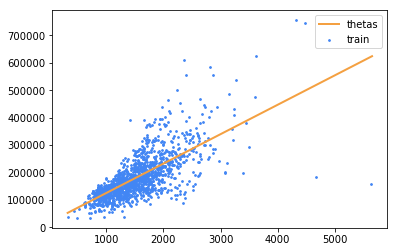

In [3]:
plt.show()

## How to deal with polynomial features

Using `PolynomialFeatures()` function.

In [4]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(5)
X_train_poly = poly.fit_transform(X_train)
print(X_train_poly)

[[  1.00000000e+00   1.71000000e+03   2.92410000e+06   5.00021100e+09
    8.55036081e+12   1.46211170e+16]
 [  1.00000000e+00   1.26200000e+03   1.59264400e+06   2.00991673e+09
    2.53651491e+12   3.20108182e+15]
 [  1.00000000e+00   1.78600000e+03   3.18979600e+06   5.69697566e+09
    1.01747985e+13   1.81721902e+16]
 ..., 
 [  1.00000000e+00   2.34000000e+03   5.47560000e+06   1.28129040e+10
    2.99821954e+13   7.01583371e+16]
 [  1.00000000e+00   1.07800000e+03   1.16208400e+06   1.25272655e+09
    1.35043922e+12   1.45577348e+15]
 [  1.00000000e+00   1.25600000e+03   1.57753600e+06   1.98138522e+09
    2.48861983e+12   3.12570651e+15]]


In [5]:
reg = LinearRegression()
reg.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
xfit = np.linspace(X_train.min() - 10, X_train.max() + 10, 100).reshape(-1, 1)
xfit_poly = poly.fit_transform(xfit)
yfit = reg.predict(xfit_poly)
plt.scatter(train_df["GrLivArea"], train_df["SalePrice"], label='train', s=3, color="#4286f4")
plt.plot(xfit, yfit, color="#f4a041", linewidth=2, label='thetas')
plt.legend()

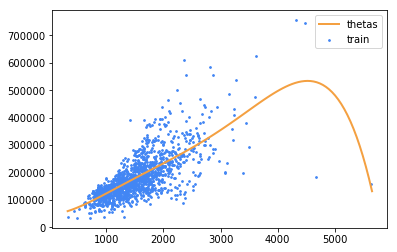

In [7]:
plt.show()

## Or using more sophisticated models

In [8]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [9]:
xfit = np.linspace(X_train.min() - 10, X_train.max() + 10, 100).reshape(-1, 1)
yfit = rf_reg.predict(xfit)
plt.scatter(train_df["GrLivArea"], train_df["SalePrice"], label='train', s=3, color="#4286f4")
plt.plot(xfit, yfit, color="#f4a041", linewidth=2, label='thetas')
plt.legend()

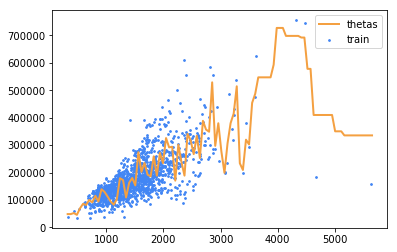

In [10]:
plt.show()